<a href="https://colab.research.google.com/github/uzairname/OtsegoStoryProject/blob/main/experiments/Final_Analysis_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import numpy as np
import random
import re
from nltk.tokenize import sent_tokenize

np.random.seed(42)
random.seed(42)

# -------------------------------
# 1. Data Loading & Preprocessing
# -------------------------------
nltk.download('vader_lexicon')

# Load CSV (ensure the file is in your working directory)
df = pd.read_csv('data/long_file.csv', parse_dates=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df[df['timestamp'].notnull()]  # Remove rows with invalid timestamps
df['content'] = df['content'].fillna("").astype(str)

nltk.download('punkt_tab')

def preprocess_text(text):

    # Filter out sentences that are shorter than 20 characters
    text = sent_tokenize(text)
    filtered_sentences = [s for s in text if len(s) >= 20]

    # Remove non-alphanumeric characters from each sentence
    cleaned_sentences = [re.sub(r'[^a-zA-Z0-9\s]', '', s) for s in filtered_sentences]

    # Optionally: convert the text to lowercase for uniformity
    cleaned_sentences = [s.lower() for s in cleaned_sentences]

    # Join the cleaned sentences back into one string
    return ' '.join(cleaned_sentences)

# Apply the preprocessing function to the content column
df['cleaned_content'] = df['content'].apply(preprocess_text)

# remove empty rows
df = df[df['cleaned_content'] != '']

# Inspect the first few rows of the new column
print(df[['content', 'cleaned_content']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                             content  \
0             So proud of you,\nChristina DeGrush\n!   
1             So Proud\nway to go\nChristina DeGrush   
3                I’ll be sure to take msu over there   
4  Outreach to people who grew up here but no lon...   
5  Whole house reverse osmosis water filter syste...   

                                     cleaned_content  
0               so proud of you\nchristina degrush\n  
1             so proud\nway to go\nchristina degrush  
3                 ill be sure to take msu over there  
4  outreach to people who grew up here but no lon...  
5  whole house reverse osmosis water filter syste...  


In [3]:
# -------------------------------
# 2. Sentiment Analysis: VADER
# -------------------------------
vader = SentimentIntensityAnalyzer()
df['vader_compound'] = df['content'].apply(lambda x: vader.polarity_scores(x)['compound'])

# -------------------------------
# 3. Sentiment Analysis: BERT
# -------------------------------
# Initialize a BERT sentiment-analysis pipeline.
bert_pipeline = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# def get_bert_compound(text):
#     # Get the sentiment result (returns a list of dicts)
#     result = bert_pipeline(text)
#     # Extract the star rating from the label (e.g., "4 stars")
#     label = result[0]['label']
#     rating = int(label.split()[0])
#     # Map rating (1-5) to a compound score between -1 and 1:
#     # 1 -> -1.0, 2 -> -0.5, 3 -> 0.0, 4 -> 0.5, 5 -> 1.0
#     compound = (rating - 3) / 2.0
#     return compound

# # Apply BERT sentiment analysis (this may take a bit, depending on the dataset size)
# df['bert_compound'] = df['content'].apply(get_bert_compound)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [5]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import HDBSCAN
from bertopic.representation import KeyBERTInspired
from umap import UMAP


model = BERTopic(
    embedding_model="all-MiniLM-L6-v2",
    top_n_words=10,
    min_topic_size=10,
    n_gram_range=(1, 2),
    vectorizer_model=CountVectorizer(ngram_range=(1, 2), stop_words="english"),
    representation_model=KeyBERTInspired(),
    hdbscan_model= HDBSCAN(min_cluster_size=20),
    umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine'),
    verbose=True,
    nr_topics=6,
)

topics, probs = model.fit_transform(df['cleaned_content'])
df['topic'] = topics


2025-04-16 19:16:38,031 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

2025-04-16 19:16:50,967 - BERTopic - Embedding - Completed ✓
2025-04-16 19:16:50,970 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-16 19:17:05,876 - BERTopic - Dimensionality - Completed ✓
2025-04-16 19:17:05,878 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-16 19:17:05,898 - BERTopic - Cluster - Completed ✓
2025-04-16 19:17:05,899 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-16 19:17:05,965 - BERTopic - Representation - Completed ✓
2025-04-16 19:17:05,966 - BERTopic - Topic reduction - Reducing number of topics
2025-04-16 19:17:05,980 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-16 19:17:08,852 - BERTopic - Representation - Completed ✓
2025-04-16 19:17:08,864 - BERTopic - Topic reduction - Reduced number of topics from 7 to 6


In [13]:
model.generate_topic_labels(nr_words=5)
# Group content by topic, view representative docs by topic


['-1_otsego township_otsego_allegan county_township_pfas',
 '0_mary zack_mary thank_mary_zack post_zack',
 '1_water contamination_city water_contaminated wells_contamination_contaminated',
 '2_died cancer_cancer_breast cancer_tumor_cancer center',
 '3_test results_develops test_tests_wells tested_standard test',
 '4_city otsego_lived otsego_living otsego_otsego_live otsego']

In [ ]:
# -------------------------------
# 2. Sentiment Analysis: VADER
# -------------------------------
vader = SentimentIntensityAnalyzer()
df['vader_compound'] = df['content'].apply(lambda x: vader.polarity_scores(x)['compound'])

# -------------------------------
# 3. Sentiment Analysis: BERT
# -------------------------------
# Initialize a BERT sentiment-analysis pipeline.
bert_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def get_bert_compound(text):
    # Get the sentiment result (returns a list of dicts)
    result = bert_pipeline(text)
    # Extract the star rating from the label (e.g., "4 stars")
    label = result[0]['label']
    rating = int(label.split()[0])
    # Map rating (1-5) to a compound score between -1 and 1:
    # 1 -> -1.0, 2 -> -0.5, 3 -> 0.0, 4 -> 0.5, 5 -> 1.0
    compound = (rating - 3) / 2.0
    return compound

# Apply BERT sentiment analysis (this may take a bit, depending on the dataset size)
df['bert_compound'] = df['content'].apply(get_bert_compound)


Device set to use cpu


In [ ]:
df.groupby('topic')['']

In [ ]:
# -------------------------------
# 4. Daily Aggregation & Forecasting
# -------------------------------
# Create a date column
df['date'] = df['timestamp'].dt.date

# Aggregate daily average sentiment for VADER and BERT
# daily_vader = df.groupby('date')['vader_compound'].mean().reset_index().rename(columns={'vader_compound': 'avg_compound'})
# daily_bert = df.groupby('date')['bert_compound'].mean().reset_index().rename(columns={'bert_compound': 'avg_compound'})
df['day_mean_vader'] = df.groupby('date')['vader_compound'].transform('mean')
df['day_mean_bert'] = df.groupby('date')['bert_compound'].transform('mean')


# Forecast function using linear regression
def forecast_sentiment():
    # Convert dates to ordinal numbers for regression
    daily_df['date_ordinal'] = pd.to_datetime(daily_df['date']).apply(lambda date: date.toordinal())
    X = daily_df['date_ordinal'].values.reshape(-1, 1)
    y = daily_df['avg_compound'].values
    model = LinearRegression()
    model.fit(X, y)

    # Forecast from the day after the last date until the end of 2026
    last_date = pd.to_datetime(daily_df['date'].max())
    future_dates = pd.date_range(start=last_date + timedelta(days=1), end=pd.Timestamp("2026-12-31"))
    future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)
    predicted = model.predict(future_ordinals)
    future_df = pd.DataFrame({'date': future_dates, 'predicted_compound': predicted})
    return future_df

vader_forecast = forecast_sentiment(df[['date', 'day_mean_vader']].rename(columns={'day_mean_vader': 'avg_compound'}))
bert_forecast = forecast_sentiment(df[['date', 'day_mean_bert']].rename(columns={'day_mean_bert': 'avg_compound'}))

# -------------------------------
# 5. Visualization
# -------------------------------

# Figure 1: Trend Plots (side-by-side) for VADER and BERT with Forecasts
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# VADER Plot
axs[0].plot(daily_vader['date'], df['avg_compound'], marker='o', label='Historical')
axs[0].plot(vader_forecast['date'], vader_forecast['predicted_compound'], marker='x', linestyle='--', label='Forecast')
axs[0].set_xlabel('Date', fontsize=12)
axs[0].set_ylabel('Avg Compound Sentiment', fontsize=12)
axs[0].set_title('VADER Sentiment Trend & Forecast', fontsize=14)
axs[0].set_ylim(-1, 1)
axs[0].axhline(y=0.05, color='gray', linestyle='--', linewidth=1)
axs[0].axhline(y=-0.05, color='gray', linestyle='--', linewidth=1)
axs[0].grid(True)
axs[0].legend(fontsize=10)
axs[0].text(daily_vader['date'].iloc[-1], 0.07, 'Positive', color='green', fontsize=10)
axs[0].text(daily_vader['date'].iloc[-1], 0.00, 'Neutral', color='blue', fontsize=10)
axs[0].text(daily_vader['date'].iloc[-1], -0.09, 'Negative', color='red', fontsize=10)

# BERT Plot
axs[1].plot(daily_bert['date'], daily_bert['avg_compound'], marker='o', label='Historical')
axs[1].plot(bert_forecast['date'], bert_forecast['predicted_compound'], marker='x', linestyle='--', label='Forecast')
axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_title('BERT Sentiment Trend & Forecast', fontsize=14)
axs[1].set_ylim(-1, 1)
axs[1].axhline(y=0.05, color='gray', linestyle='--', linewidth=1)
axs[1].axhline(y=-0.05, color='gray', linestyle='--', linewidth=1)
axs[1].grid(True)
axs[1].legend(fontsize=10)
axs[1].text(daily_bert['date'].iloc[-1], 0.07, 'Positive', color='green', fontsize=10)
axs[1].text(daily_bert['date'].iloc[-1], 0.00, 'Neutral', color='blue', fontsize=10)
axs[1].text(daily_bert['date'].iloc[-1], -0.09, 'Negative', color='red', fontsize=10)

plt.tight_layout()
plt.show()

# Figure 2: Scatter Plot Comparing VADER vs. BERT for Each Post
plt.figure(figsize=(8, 6))
plt.scatter(df['vader_compound'], df['bert_compound'], alpha=0.6)
plt.xlabel('VADER Compound Score', fontsize=12)
plt.ylabel('BERT Compound Score', fontsize=12)
plt.title('VADER vs. BERT Sentiment Scores', fontsize=14)
plt.grid(True)
lims = [-1, 1]
plt.plot(lims, lims, 'r--', linewidth=1)  # Diagonal reference line
plt.xlim(lims)
plt.ylim(lims)
plt.tight_layout()
plt.show()

# Figure 3: Histograms of Sentiment Distributions for VADER and BERT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

ax1.hist(df['vader_compound'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('VADER Sentiment Distribution', fontsize=14)
ax1.set_xlabel('VADER Compound Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_xlim(-1, 1)
ax1.grid(True)

ax2.hist(df['bert_compound'], bins=20, color='salmon', edgecolor='black')
ax2.set_title('BERT Sentiment Distribution', fontsize=14)
ax2.set_xlabel('BERT Compound Score', fontsize=12)
ax2.set_xlim(-1, 1)
ax2.grid(True)

plt.tight_layout()
plt.show()

# -------------------------------
# 6. Summary Statistics & Analysis Output
# -------------------------------

<ipython-input-29-33aca2bd6e81>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(vader_box_data, labels=days_order)
<ipython-input-29-33aca2bd6e81>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot(bert_box_data, labels=days_order)


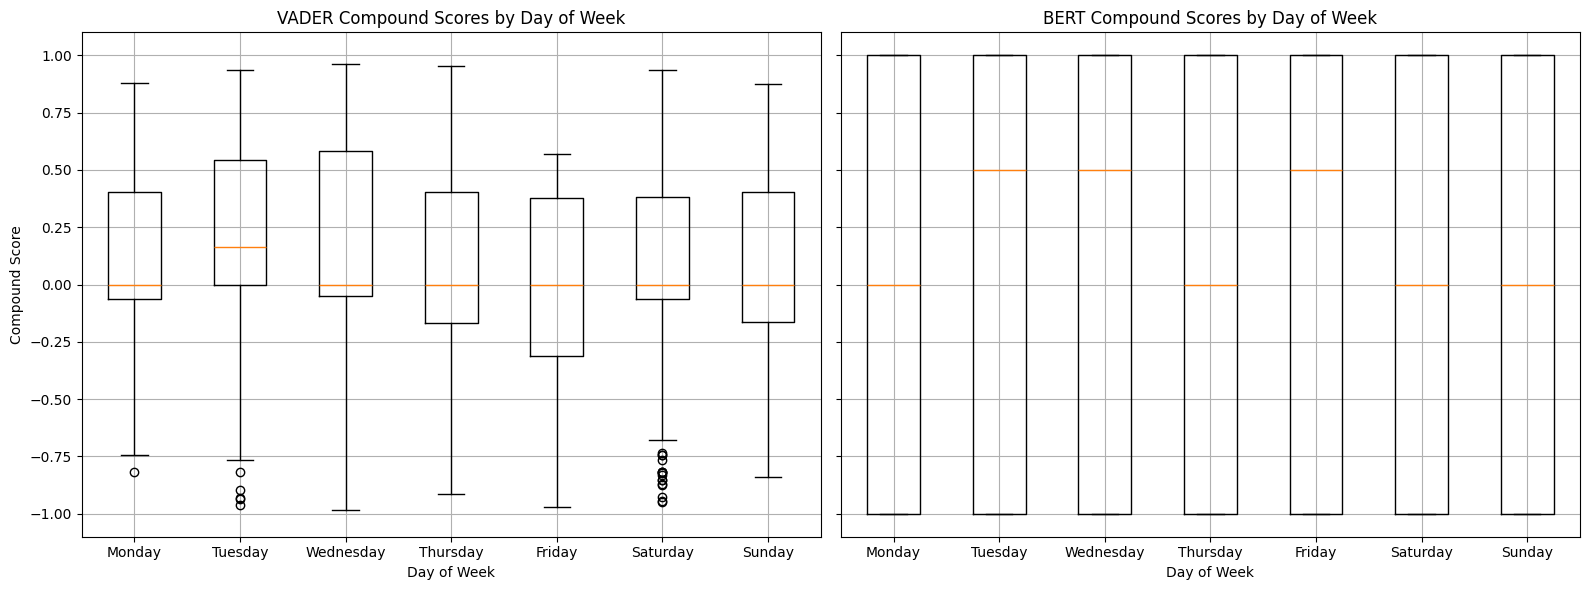

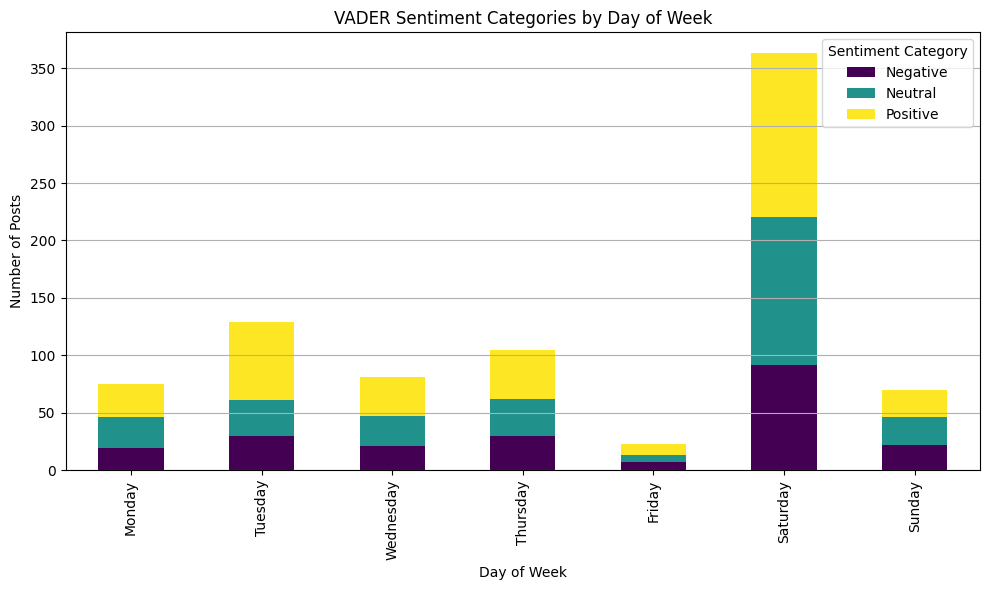

Summary Statistics:
Total posts analyzed: 846
Average VADER compound score: 0.081
Average BERT compound score: 0.039
Standard Deviation VADER compound score: 0.451
Standard Deviation BERT compound score: 0.822

VADER Sentiment Category Counts:
vader_compound
Positive    351
Neutral     274
Negative    221
Name: count, dtype: int64

BERT Sentiment Category Counts:
bert_compound
Positive    363
Negative    322
Neutral     161
Name: count, dtype: int64

Correlation between VADER and BERT compound scores: 0.415


In [29]:
# Additional Visualizations

import matplotlib.pyplot as plt

# --- Visualization 4: Box Plots of VADER and BERT Compound Scores by Day of Week ---

# Create a 'day_of_week' column in the DataFrame with proper ordering
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_of_week'] = pd.Categorical(df['timestamp'].dt.day_name(), categories=days_order, ordered=True)

# Prepare the data lists for each day for both VADER and BERT scores
vader_box_data = [df.loc[df['day_of_week'] == day, 'vader_compound'].dropna() for day in days_order]
bert_box_data = [df.loc[df['day_of_week'] == day, 'bert_compound'].dropna() for day in days_order]

# Create side-by-side box plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axs[0].boxplot(vader_box_data, labels=days_order)
axs[0].set_title("VADER Compound Scores by Day of Week")
axs[0].set_xlabel("Day of Week")
axs[0].set_ylabel("Compound Score")
axs[0].grid(True)

axs[1].boxplot(bert_box_data, labels=days_order)
axs[1].set_title("BERT Compound Scores by Day of Week")
axs[1].set_xlabel("Day of Week")
axs[1].grid(True)

plt.tight_layout()
plt.show()


# --- Visualization 5: Stacked Bar Chart of VADER Sentiment Categories by Day of Week ---

# Define a helper function to assign sentiment categories for VADER
def categorize(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new category column for VADER scores
df['vader_category'] = df['vader_compound'].apply(categorize)

# Create a pivot table: counts of sentiment categories by day of week
pivot = df.groupby('day_of_week')['vader_category'].value_counts().unstack().fillna(0).loc[days_order]

# Plot a stacked bar chart for the VADER sentiment categories by day
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("VADER Sentiment Categories by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment Category")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("Summary Statistics:")

total_posts = len(df)
print(f"Total posts analyzed: {total_posts}")

avg_vader = df['vader_compound'].mean()
avg_bert = df['bert_compound'].mean()
std_vader = df['vader_compound'].std()
std_bert = df['bert_compound'].std()

print(f"Average VADER compound score: {avg_vader:.3f}")
print(f"Average BERT compound score: {avg_bert:.3f}")
print(f"Standard Deviation VADER compound score: {std_vader:.3f}")
print(f"Standard Deviation BERT compound score: {std_bert:.3f}")

# Define a helper function to assign a sentiment category
def categorize(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vader_categories = df['vader_compound'].apply(categorize)
bert_categories = df['bert_compound'].apply(categorize)

vader_counts = vader_categories.value_counts()
bert_counts = bert_categories.value_counts()

print("\nVADER Sentiment Category Counts:")
print(vader_counts)
print("\nBERT Sentiment Category Counts:")
print(bert_counts)

corr = df['vader_compound'].corr(df['bert_compound'])
print(f"\nCorrelation between VADER and BERT compound scores: {corr:.3f}")

# Sentiment Analysis Summary

**Total Posts Analyzed:** 256

## Overall Sentiment
- **VADER Average Compound:** 0.086  
- **BERT Average Compound:** 0.092  
*Both methods show slightly positive averages, but these can mask underlying complexity.*

- **VADER Std. Dev.:** 0.449  
- **BERT Std. Dev.:** 0.800  
*BERT exhibits a wider range, indicating more extreme sentiment values.*

## Sentiment Categories
- **VADER Counts:**
  - Positive: 110
  - Neutral: 84
  - Negative: 62

- **BERT Counts:**
  - Positive: 117
  - Negative: 91
  - Neutral: 48

*BERT flags more negative posts, suggesting higher sensitivity to distress.*

## Correlation Between Methods
- **Correlation:** 0.437  
*Moderate correlation indicates the two methods capture sentiment differently.*

## Insights & Recommendations
- **Context Matters:**  
  The slightly positive averages hide variability. BERT’s higher negative count may better reflect community distress.
  
- **Multiple Methods:**  
  Using both VADER and BERT provides a fuller picture. Consider fine-tuning BERT on domain-specific data for improved accuracy.

- **Additional Visualizations:**  
  - **Heatmaps/Calendar Plots:** Identify periods with heightened negative sentiment.  
  - **Topic Modeling:** Use LDA to link themes (e.g., water quality, cancer) with sentiment trends.  
  - **Event Annotations:** Overlay key community events on trend graphs to contextualize shifts in sentiment.

## Conclusion
While overall sentiment appears slightly positive, the variability and methodological differences (especially BERT’s detection of more negative sentiment) suggest that the community's emotional response is more nuanced and polarized. This underscores the need for a combined quantitative and qualitative approach to fully capture the community's experiences, particularly given the serious issues of water quality and health.

